In [1]:
#3章　ニューラルネットワーク
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import theano
import theano.tensor as T

Using TensorFlow backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\hfuis\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
#3.3 単純パーセプトロン
#シンボル
x = T.dscalar("x")

In [3]:
y = x**2

In [4]:
#これにより関数（写像）として計算可能
f = theano.function(inputs = [x], outputs = y)

In [5]:
f(1)

array(1.)

In [6]:
f(5)

array(25.)

In [7]:
#自動微分
gy = T.grad(cost=y, wrt=x)

In [8]:
g = theano.function(inputs = [x], outputs = gy)

In [9]:
g(1)

array(2.)

In [10]:
g(2)

array(4.)

In [11]:
rng = np.random.RandomState(13)

d = 2    #データの次元
N = 10   #各パターンのデータ数
mean = 5 #ニューロンが発火する(1)データの平均値

x1 = rng.randn(N, d) + np.array([0, 0])
x2 = rng.randn(N, d) + np.array([mean, mean])

In [18]:
#2種類のデータを一つにまとめる。
x = np.concatenate((x1, x2), axis = 0)
x

array([[-0.71239066,  0.75376638],
       [-0.04450308,  0.45181234],
       [ 1.34510171,  0.53233789],
       [ 1.3501879 ,  0.86121137],
       [ 1.47868574, -1.04537713],
       [-0.78898902, -1.26160595],
       [ 0.56284679, -0.24332625],
       [ 0.9137407 ,  0.31735092],
       [ 0.12730328,  2.15038297],
       [ 0.60628866, -0.02677165],
       [ 4.01583922,  6.19070527],
       [ 5.95283061,  3.91281841],
       [ 4.85478867,  5.23785784],
       [ 3.36090659,  4.72186548],
       [ 6.39923842,  3.38489204],
       [ 5.49087183,  6.89274222],
       [ 4.3790203 ,  4.54624762],
       [ 5.21745166,  5.51432886],
       [ 5.39724133,  3.48715488],
       [ 4.23596603,  5.10126979]])

In [19]:
x[1]

array([-0.04450308,  0.45181234])

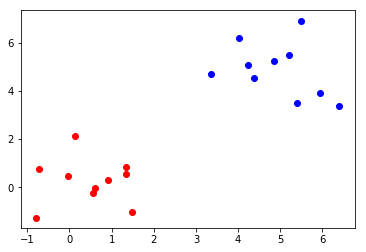

In [13]:
#データ分布
plt.scatter(x1[:,0],x1[:,1],c="red")
plt.scatter(x2[:,0],x2[:,1],c="blue")

In [14]:
#モデルのパラメータの初期化
w = np.zeros(d)
b = 0

In [15]:
#単純パーセプトロン(出力：1 or 0)
def y(x):
    return step(np.dot(w, x) + b)

def step(x):
    return 1 * (x > 0)

In [16]:
#教師（正しい出力値）
def t(i):
    if i < N:
        return 0
    else:
        return 1

In [20]:
#正解の極値へ近づける。
while True:
    classified = True
    for i in range(N * 2):
        D_w = (t(i) - y(x[i])) * x[i]
        D_b = (t(i) - y(x[i]))
        w += D_w
        b += D_b
        #tとyが完全に一致したか？
        classified *= all(D_w == 0) * (D_b == 0)
    if classified:
        break

In [22]:
#モデルの生成(パラメータの設定)
print(w)
print(b)

[1.03639937 1.1238434 ]
-5


In [23]:
#期待通りモデルが生成されている。
print(y([0, 0]))
print(y([5, 5]))

0
1


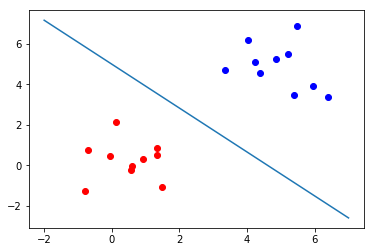

In [25]:
#データ分布の分類直線
plt.scatter(x1[:,0],x1[:,1],c="red")
plt.scatter(x2[:,0],x2[:,1],c="blue")
X = np.linspace(-2, 7, 100)
plt.plot(X, -b - X * w[1]/w[0])

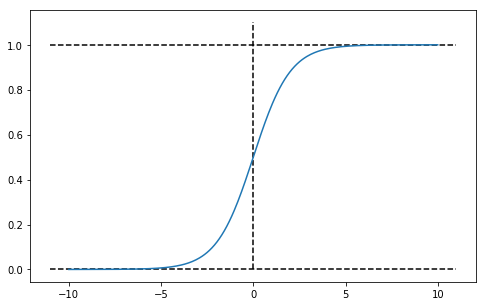

In [12]:
#3.4 ロジスティック回帰
#シグモイド関数
x = np.linspace(-10, 10, 300)
sigma = 1/(1+np.exp(-x))

_, ax = plt.subplots(figsize = (8, 5))
ax.plot(x, sigma)

xmin = x.min() * 1.1
xmax = x.max() * 1.1
ymin = sigma.min() * 1.1
ymax = sigma.max() * 1.1
ax.hlines([0,1], xmin, xmax, linestyle = 'dashed')
ax.vlines([0], ymin, ymax, linestyle = 'dashed')

plt.show()

In [ ]:
#確率的勾配降下法(疑似コード)
for epoch in range(epochs): #N個のデータ全体の繰り返し回数
    shuffle(data)           #エポックごとにデータシャッフル
    for datum in data:
        params_grad = evaluate_grad(error_function, params, datum)
        params -= learning_rate * params_grad

In [ ]:
#ミニバッチ勾配降下法(疑似コード)
for epoch in range(epochs): #N個のデータ全体の繰り返し回数
    shuffle(data)           #エポックごとにデータシャッフル
    batches = get_batches(data, batch_size = M) #M = 50～500くらいのかたまりに分ける
    for batch in batches:
        params_grad = evaluate_grad(error_function, params, batch)
        params -= learning_rate * params_grad

In [17]:
#Tensorflowによる実装
#ORゲートの学習

#入力は2次元(重みwは２個)、bはバイアス。
w = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

In [18]:
#printでは中身が見れない。
print(w)

<tf.Variable 'Variable_2:0' shape=(2, 1) dtype=float32_ref>


In [19]:
#モデルの出力(ロジスティック回帰)
#y = sigma(w^T*x + b)

x = tf.placeholder(tf.float32, shape = [None, 2]) #入力データ
t = tf.placeholder(tf.float32, shape = [None, 1]) #正解の出力(教師)
y = tf.nn.sigmoid(tf.matmul(x, w) + b)            #モデルの出力

In [21]:
#交差エントロピー誤差関数(目的関数)
#最小化させることで予想を行う。
cross_entropy = -tf.reduce_sum(t*tf.log(y) + (1-t) * tf.log(1 - y))

In [22]:
#目的関数の偏微分と勾配降下法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy) 
#0.1は学習率

In [23]:
#modelの出力yと教師tが一致しているか(bool値)
#greater(x,y) x>yの真理値
correct_prediction = tf.equal(tf.to_float(tf.greater(y,0.5)), t)

In [24]:
#データ
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

In [25]:
#変数(tf.Variable)の初期化
init = tf.global_variables_initializer()
#セッション(計算グラフ(学習)の実行環境)
sess = tf.Session()
#変数初期化の実行
sess.run(init)

In [26]:
#データの学習実行(勾配降下法)
for epoch in range(200): #epoch(gradで足し合わせする回数)は200回に設定。
    sess.run(train_step, feed_dict = {
        x: X,
        t: Y
    })

In [27]:
#modelの出力yと教師tが一致しているかの実行
classified = correct_prediction.eval(session = sess, feed_dict = {
    x: X,
    t: Y
})
print(classified)

[[ True]
 [ True]
 [ True]
 [ True]]


In [28]:
#入力（X)を食わせた時の出力
prob = y.eval(session = sess, feed_dict = {
    x: X,
    t: Y
})
print(prob)

[[0.22355042]
 [0.9142595 ]
 [0.9142595 ]
 [0.99747413]]


In [29]:
#学習によって得られたパラメータ。
print(sess.run(w))
print(sess.run(b))

[[3.6118839]
 [3.6118839]]
[-1.2450948]


In [2]:
#Kerasによる実装

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential([
    Dense(input_dim = 2, units = 1), #w1x1 + w2x2 + bを生成
    Activation('sigmoid')            #活性化関数y = sigma(1x1 + w2x2 + b)を決める
])

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.compile(loss = "binary_crossentropy", #損失関数の決定
              optimizer = SGD(lr = 0.1)    #最適化の方法(確率的勾配降下法に決めている)
             )

In [6]:
#データ
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [1]])

In [7]:
model.fit(X, Y, epochs = 200, batch_size = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/200
4/4 [==============================] - 1s 285ms/step - loss: 0.4225
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4089
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3976
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3877
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3789
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3711
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3641
Epoch 8/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3578
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3520
Epoch 10/200
4/4 [==============================] - 0s 1ms/step - loss: 0.3465
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.3414
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 0.3368
Epoch 13/20

In [9]:
prob = model.predict_proba(X, batch_size = 1)
print(prob)

[[0.20647557]
 [0.9239311 ]
 [0.9162644 ]
 [0.99804604]]


In [5]:
#多クラスロジスティック回帰
from sklearn.utils import shuffle

In [7]:
M = 2 #入力データの次元
K = 3 #クラス数
n = 100 #クラスごとのデータ数
N = n * K #全データ数

In [18]:
#サンプルデータ群の生成
X1 = np.random.randn(n, M) + np.array([0, 10])
X2 = np.random.randn(n, M) + np.array([5, 5])
X3 = np.random.randn(n, M) + np.array([10, 0])
#教師(ニューロンの発火)
Y1 = np.array([ [1, 0, 0] for i in range(n) ] )
Y2 = np.array([ [0, 1, 0] for i in range(n) ] )
Y3 = np.array([ [0, 0, 1] for i in range(n) ] )

#それぞれのデータ結合
X = np.concatenate((X1, X2, X3), axis = 0)
Y = np.concatenate((Y1, Y2, Y3), axis = 0)

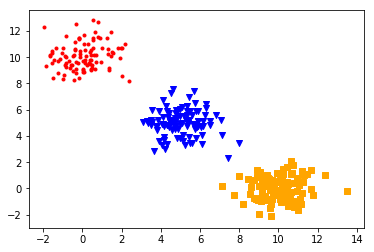

In [40]:
#サンプルデータ分布
plt.scatter(X[0:100,0],X[0:100,1],c="red",marker=".")
plt.scatter(X[100:200,0],X[100:200,1],c="blue",marker="v")
plt.scatter(X[200:300,0],X[200:300,1],c="orange",marker="s")

In [25]:
#パラメータの初期化
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

#モデルの出力(多クラスロジスティック回帰)
x = tf.placeholder(tf.float32, shape = [None, M]) #入力データ
t = tf.placeholder(tf.float32, shape = [None, K]) #正解の出力(教師)
y = tf.nn.softmax(tf.matmul(x, W) + b)            #モデルの出力

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
#交差エントロピー誤差関数(目的関数)
#ミニバッチごとの平均値はここで求める。
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y), reduction_indices = [1]))

In [33]:
#目的関数の偏微分と勾配降下法
#最小化させることで予想を行う。
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy) 
#0.1は学習率

Instructions for updating:
Use tf.cast instead.


In [37]:
batch_size = 50 #ミニバッチサイズ
n_batches = N//batch_size

#変数(tf.Variable)の初期化
init = tf.global_variables_initializer()
#セッション(計算グラフ(学習)の実行環境)
sess = tf.Session()
#変数初期化の実行
sess.run(init)

In [42]:
#modelの出力yと教師tが一致しているか(bool値)
#greater(x,y) x>yの真理値
correct_prediction = tf.equal(tf.to_float(tf.greater(y,0.5)), t)

Instructions for updating:
Use tf.cast instead.


In [38]:
#データの学習実行(ミニバッチ勾配降下法)
for epoch in range(20): #各エポックごとにデータをシャッフル。
    X_, Y_ = shuffle(X, Y)
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict = {
            x: X_[start:end],
            t: Y_[start:end]
        })

In [44]:
#10個のデータで分類が正しいか評価
X_, Y_ = shuffle(X, Y)

#modelの出力yと教師tが一致しているかの実行
classified = correct_prediction.eval(session = sess, feed_dict = {
    x: X_[0:10],
    t: Y_[0:10]
})
#入力（X)を食わせた時の出力
plob = y.eval(session = sess, feed_dict = {
    x: X_[0:10]
})

print("classified:")
print(classified)
print()
print("output probability:")
print(plob)

classified:
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]

output probability:
[[9.8812079e-01 1.1879249e-02 4.4311950e-08]
 [9.9343187e-01 6.5681310e-03 9.0637725e-10]
 [6.6429853e-02 9.3336171e-01 2.0840846e-04]
 [1.2825438e-03 9.8978043e-01 8.9369752e-03]
 [1.7699590e-07 5.2146669e-02 9.4785321e-01]
 [1.5297288e-10 1.2360811e-03 9.9876392e-01]
 [1.6103709e-09 3.1402274e-03 9.9685979e-01]
 [9.9575531e-01 4.2447448e-03 8.2174756e-09]
 [7.4151121e-03 9.5374644e-01 3.8838495e-02]
 [9.9739069e-01 2.6093905e-03 2.6608973e-10]]


In [46]:
X_[0:10].shape

(10, 2)

In [2]:
#多層パーセプトロン
#XOR
#tensor flowによる実装
#データ
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

In [3]:
x = tf.placeholder(tf.float32, shape = [None, 2]) #入力データ
t = tf.placeholder(tf.float32, shape = [None, 1]) #正解の出力(教師)

In [5]:
#入力層-隠れ層
#入力は2次元(重みWは2×2)、bはバイアス(2×1)。
#truncated_normal:切断正規分布(defaultだとmean=0,std=1)
W = tf.Variable(tf.truncated_normal(shape = [2, 2]))
b = tf.Variable(tf.zeros([2]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)            #モデルの出力

In [6]:
#隠れ層-出力層
#入力は2次元(重みVは2×1)、bはバイアス(scalar)。
#truncated_normal:切断正規分布(defaultだとmean=0,std=1)
V = tf.Variable(tf.truncated_normal(shape = [2, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)            #モデルの出力

In [7]:
#交差エントロピー誤差関数(目的関数)
#最小化させることで予想を行う。
cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))

In [8]:
#目的関数の偏微分と勾配降下法
#最小化させることで予想を行う。
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy) 
#0.1は学習率

#modelの出力yと教師tが一致しているか(bool値)
#greater(x,y) x>yの真理値
correct_prediction = tf.equal(tf.to_float(tf.greater(y,0.5)), t)

Instructions for updating:
Use tf.cast instead.


In [9]:
#変数(tf.Variable)の初期化
init = tf.global_variables_initializer()
#セッション(計算グラフ(学習)の実行環境)
sess = tf.Session()
#変数初期化の実行
sess.run(init)

#データの学習実行(勾配降下法)
for epoch in range(4000): #gradで足し合わせする回数
    sess.run(train_step, feed_dict = {
        x: X,
        t: Y
    })
    if epoch % 1000 == 0:
        print("epoch:", epoch)

epoch: 0
epoch: 1000
epoch: 2000
epoch: 3000


In [10]:
#modelの出力yと教師tが一致しているかの実行
classified = correct_prediction.eval(session = sess, feed_dict = {
    x: X,
    t: Y
})
#入力（X)を食わせた時の出力
plob = y.eval(session = sess, feed_dict = {
    x: X
})

print("classified:")
print(classified)
print()
print("output probability:")
print(plob)

classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.00984458]
 [0.9923178 ]
 [0.9925896 ]
 [0.00856041]]


In [2]:
#Kerasによる実装

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()

In [3]:
#model.add()で層ごとにモデルを追加していく。

#入力層-隠れ層
model.add(Dense(input_dim = 2, units = 2))#入力2、節2
model.add(Activation('sigmoid'))#活性化関数(シグモイド関数)

#隠れ層-入力層
model.add(Dense(units = 1))#節(出力)1
model.add(Activation('sigmoid'))#活性化関数(シグモイド関数)

model.compile(loss = "binary_crossentropy", #損失関数の決定
              optimizer = SGD(lr = 0.1)    #最適化の方法(確率的勾配降下法に決めている)
             )

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
#データ
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

model.fit(X, Y, epochs = 4000, batch_size = 4)

Instructions for updating:
Use tf.cast instead.
Epoch 1/4000
4/4 [==============================] - 1s 283ms/step - loss: 0.8307
Epoch 2/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.8219
Epoch 3/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.8136
Epoch 4/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.8059
Epoch 5/4000
4/4 [==============================] - 0s 997us/step - loss: 0.7987
Epoch 6/4000
4/4 [==============================] - 0s 749us/step - loss: 0.7920
Epoch 7/4000
4/4 [==============================] - 0s 750us/step - loss: 0.7857
Epoch 8/4000
4/4 [==============================] - 0s 500us/step - loss: 0.7799
Epoch 9/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.7744
Epoch 10/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.7693
Epoch 11/4000
4/4 [==============================] - 0s 749us/step - loss: 0.7646
Epoch 12/4000
4/4 [==============================] - 0s 750us/step

Epoch 99/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6985
Epoch 100/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6984
Epoch 101/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6984
Epoch 102/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6984
Epoch 103/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6983
Epoch 104/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6983
Epoch 105/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6983
Epoch 106/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6983
Epoch 107/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6982
Epoch 108/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6982
Epoch 109/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6982
Epoch 110/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6981
Epoch

Epoch 198/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6965
Epoch 199/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6965
Epoch 200/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6965
Epoch 201/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6965
Epoch 202/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6965
Epoch 203/4000
4/4 [==============================] - 0s 999us/step - loss: 0.6965
Epoch 204/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6964
Epoch 205/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6964
Epoch 206/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6964
Epoch 207/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6964
Epoch 208/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6964
Epoch 209/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6964
Epoch 

Epoch 297/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6954
Epoch 298/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6954
Epoch 299/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6954
Epoch 300/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6953
Epoch 301/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6953
Epoch 302/4000
4/4 [==============================] - 0s 249us/step - loss: 0.6953
Epoch 303/4000
4/4 [==============================] - 0s 249us/step - loss: 0.6953
Epoch 304/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6953
Epoch 305/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6953
Epoch 306/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6953
Epoch 307/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6953
Epoch 308/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6953
Epoc

Epoch 396/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6946
Epoch 397/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6946
Epoch 398/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6946
Epoch 399/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6946
Epoch 400/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6946
Epoch 401/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6946
Epoch 402/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6945
Epoch 403/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6945
Epoch 404/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6945
Epoch 405/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6945
Epoch 406/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6945
Epoch 407/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6945
Epoc

Epoch 495/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6940
Epoch 496/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6940
Epoch 497/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6940
Epoch 498/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6940
Epoch 499/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6940
Epoch 500/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6940
Epoch 501/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6940
Epoch 502/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6940
Epoch 503/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6940
Epoch 504/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6940
Epoch 505/4000
4/4 [==============================] - 0s 249us/step - loss: 0.6940
Epoch 506/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6940
Epoc

Epoch 594/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6936
Epoch 595/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6936
Epoch 596/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6936
Epoch 597/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6936
Epoch 598/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6936
Epoch 599/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6936
Epoch 600/4000
4/4 [==============================] - 0s 498us/step - loss: 0.6936
Epoch 601/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6936
Epoch 602/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6936
Epoch 603/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6936
Epoch 604/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6936
Epoch 605/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6936
Epoc

Epoch 693/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 694/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 695/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 696/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 697/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 698/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 699/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 700/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6933
Epoch 701/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6933
Epoch 702/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6932
Epoch 703/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 704/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6932
Epoch 70

Epoch 792/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6930
Epoch 793/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6930
Epoch 794/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 795/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6930
Epoch 796/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6930
Epoch 797/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6930
Epoch 798/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6930
Epoch 799/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6930
Epoch 800/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6930
Epoch 801/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6930
Epoch 802/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6930
Epoch 803/4000
4/4 [==============================] - 0s 249us/step - loss: 0.6930
Epoc

Epoch 891/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 892/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6927
Epoch 893/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 894/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 895/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6927
Epoch 896/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 897/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6927
Epoch 898/4000
4/4 [==============================] - 0s 501us/step - loss: 0.6927
Epoch 899/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 900/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6927
Epoch 901/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6927
Epoch 902/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6927
Epoc

Epoch 990/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6925
Epoch 991/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6925
Epoch 992/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6925
Epoch 993/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6925
Epoch 994/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6925
Epoch 995/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6925
Epoch 996/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6925
Epoch 997/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6925
Epoch 998/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6925
Epoch 999/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6925
Epoch 1000/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6925
Epoch 1001/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6925
E

Epoch 1088/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6923
Epoch 1089/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6923
Epoch 1090/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6922
Epoch 1091/4000
4/4 [==============================] - 0s 251us/step - loss: 0.6922
Epoch 1092/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6922
Epoch 1093/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6922
Epoch 1094/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6922
Epoch 1095/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6922
Epoch 1096/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6922
Epoch 1097/4000
4/4 [==============================] - 0s 751us/step - loss: 0.6922
Epoch 1098/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6922
Epoch 1099/4000
4/4 [==============================] - 0s 749us/step - loss

Epoch 1186/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6920
Epoch 1187/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6920
Epoch 1188/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6920
Epoch 1189/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6920
Epoch 1190/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6920
Epoch 1191/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6920
Epoch 1192/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6920
Epoch 1193/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6920
Epoch 1194/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6920
Epoch 1195/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6920
Epoch 1196/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6920
Epoch 1197/4000
4/4 [==============================] - 0s 500us/step - loss:

Epoch 1284/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6917
Epoch 1285/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6917
Epoch 1286/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6917
Epoch 1287/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6917
Epoch 1288/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6917
Epoch 1289/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6917
Epoch 1290/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6917
Epoch 1291/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6917
Epoch 1292/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6917
Epoch 1293/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6917
Epoch 1294/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6917
Epoch 1295/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 1382/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6913
Epoch 1383/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6913
Epoch 1384/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6913
Epoch 1385/4000
4/4 [==============================] - 0s 999us/step - loss: 0.6913
Epoch 1386/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6913
Epoch 1387/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6913
Epoch 1388/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6913
Epoch 1389/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6913
Epoch 1390/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6913
Epoch 1391/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6913
Epoch 1392/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6913
Epoch 1393/4000
4/4 [==============================] - 0s 1000us/step - loss

Epoch 1480/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 1481/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6909
Epoch 1482/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6909
Epoch 1483/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6909
Epoch 1484/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6909
Epoch 1485/4000
4/4 [==============================] - 0s 498us/step - loss: 0.6909
Epoch 1486/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6909
Epoch 1487/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6909
Epoch 1488/4000
4/4 [==============================] - 0s 999us/step - loss: 0.6909
Epoch 1489/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6909
Epoch 1490/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6909
Epoch 1491/4000
4/4 [==============================] - 0s 499us/step - loss

Epoch 1578/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6904
Epoch 1579/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6904
Epoch 1580/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6904
Epoch 1581/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6904
Epoch 1582/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6904
Epoch 1583/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6904
Epoch 1584/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6904
Epoch 1585/4000
4/4 [==============================] - 0s 999us/step - loss: 0.6904
Epoch 1586/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6904
Epoch 1587/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6904
Epoch 1588/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6904
Epoch 1589/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 1676/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6898
Epoch 1677/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6898
Epoch 1678/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6898
Epoch 1679/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6898
Epoch 1680/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6898
Epoch 1681/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6897
Epoch 1682/4000
4/4 [==============================] - 0s 248us/step - loss: 0.6897
Epoch 1683/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6897
Epoch 1684/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6897
Epoch 1685/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6897
Epoch 1686/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6897
Epoch 1687/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 1774/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6890
Epoch 1775/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6890
Epoch 1776/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6890
Epoch 1777/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6890
Epoch 1778/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6889
Epoch 1779/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6889
Epoch 1780/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6889
Epoch 1781/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6889
Epoch 1782/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6889
Epoch 1783/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6889
Epoch 1784/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6889
Epoch 1785/4000
4/4 [==============================] - 0s 749us/step - loss: 0

Epoch 1872/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6880
Epoch 1873/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6879
Epoch 1874/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6879
Epoch 1875/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6879
Epoch 1876/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6879
Epoch 1877/4000
4/4 [==============================] - 0s 501us/step - loss: 0.6879
Epoch 1878/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6879
Epoch 1879/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6879
Epoch 1880/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6879
Epoch 1881/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6878
Epoch 1882/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6878
Epoch 1883/4000
4/4 [==============================] - 0s 499us/step - loss:

Epoch 1970/4000
4/4 [==============================] - 0s 999us/step - loss: 0.6866
Epoch 1971/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6866
Epoch 1972/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6866
Epoch 1973/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6866
Epoch 1974/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6866
Epoch 1975/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6865
Epoch 1976/4000
4/4 [==============================] - 0s 999us/step - loss: 0.6865
Epoch 1977/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6865
Epoch 1978/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6865
Epoch 1979/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6865
Epoch 1980/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6865
Epoch 1981/4000
4/4 [==============================] - 0s 500us/step - loss:

Epoch 2068/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6849
Epoch 2069/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6849
Epoch 2070/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6848
Epoch 2071/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6848
Epoch 2072/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6848
Epoch 2073/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6848
Epoch 2074/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6848
Epoch 2075/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6847
Epoch 2076/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6847
Epoch 2077/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6847
Epoch 2078/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6847
Epoch 2079/4000
4/4 [==============================] - 0s 500us/step - loss: 0

Epoch 2166/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6826
Epoch 2167/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6826
Epoch 2168/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6825
Epoch 2169/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6825
Epoch 2170/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6825
Epoch 2171/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6824
Epoch 2172/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6824
Epoch 2173/4000
4/4 [==============================] - 0s 999us/step - loss: 0.6824
Epoch 2174/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6824
Epoch 2175/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6823
Epoch 2176/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6823
Epoch 2177/4000
4/4 [==============================] - 0s 500us/step - loss:

Epoch 2264/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6795
Epoch 2265/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6795
Epoch 2266/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6794
Epoch 2267/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6794
Epoch 2268/4000
4/4 [==============================] - 0s 249us/step - loss: 0.6794
Epoch 2269/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6793
Epoch 2270/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6793
Epoch 2271/4000
4/4 [==============================] - 0s 249us/step - loss: 0.6793
Epoch 2272/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6792
Epoch 2273/4000
4/4 [==============================] - 0s 756us/step - loss: 0.6792
Epoch 2274/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6792
Epoch 2275/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 2362/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6754
Epoch 2363/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6754
Epoch 2364/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6753
Epoch 2365/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6753
Epoch 2366/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6752
Epoch 2367/4000
4/4 [==============================] - 0s 501us/step - loss: 0.6752
Epoch 2368/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6751
Epoch 2369/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6751
Epoch 2370/4000
4/4 [==============================] - 0s 501us/step - loss: 0.6750
Epoch 2371/4000
4/4 [==============================] - 0s 249us/step - loss: 0.6750
Epoch 2372/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6749
Epoch 2373/4000
4/4 [==============================] - 0s 750us/step - loss:

Epoch 2460/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6700
Epoch 2461/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6699
Epoch 2462/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6699
Epoch 2463/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6698
Epoch 2464/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6697
Epoch 2465/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6697
Epoch 2466/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6696
Epoch 2467/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6695
Epoch 2468/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6695
Epoch 2469/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6694
Epoch 2470/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6693
Epoch 2471/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 2558/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6627
Epoch 2559/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6627
Epoch 2560/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6626
Epoch 2561/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6625
Epoch 2562/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6624
Epoch 2563/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6623
Epoch 2564/4000
4/4 [==============================] - 0s 747us/step - loss: 0.6622
Epoch 2565/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6621
Epoch 2566/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6621
Epoch 2567/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6620
Epoch 2568/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6619
Epoch 2569/4000
4/4 [==============================] - 0s 500us/step - loss

Epoch 2656/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6532
Epoch 2657/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6530
Epoch 2658/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.6529
Epoch 2659/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6528
Epoch 2660/4000
4/4 [==============================] - 0s 252us/step - loss: 0.6527
Epoch 2661/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6526
Epoch 2662/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6525
Epoch 2663/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6524
Epoch 2664/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6522
Epoch 2665/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6521
Epoch 2666/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6520
Epoch 2667/4000
4/4 [==============================] - 0s 500us/step - loss: 0

Epoch 2754/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6406
Epoch 2755/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6405
Epoch 2756/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6403
Epoch 2757/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6402
Epoch 2758/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6400
Epoch 2759/4000
4/4 [==============================] - 0s 250us/step - loss: 0.6399
Epoch 2760/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6397
Epoch 2761/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6396
Epoch 2762/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6394
Epoch 2763/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6393
Epoch 2764/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6391
Epoch 2765/4000
4/4 [==============================] - 0s 500us/step - loss: 0

Epoch 2852/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6244
Epoch 2853/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6242
Epoch 2854/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6240
Epoch 2855/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.6239
Epoch 2856/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.6237
Epoch 2857/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6235
Epoch 2858/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6233
Epoch 2859/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6231
Epoch 2860/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6229
Epoch 2861/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6227
Epoch 2862/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6225
Epoch 2863/4000
4/4 [==============================] - 0s 250us/step - loss: 

Epoch 2950/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6038
Epoch 2951/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6036
Epoch 2952/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6033
Epoch 2953/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6031
Epoch 2954/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6029
Epoch 2955/4000
4/4 [==============================] - 0s 750us/step - loss: 0.6026
Epoch 2956/4000
4/4 [==============================] - 0s 753us/step - loss: 0.6024
Epoch 2957/4000
4/4 [==============================] - 0s 500us/step - loss: 0.6021
Epoch 2958/4000
4/4 [==============================] - 0s 499us/step - loss: 0.6019
Epoch 2959/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6017
Epoch 2960/4000
4/4 [==============================] - 0s 749us/step - loss: 0.6014
Epoch 2961/4000
4/4 [==============================] - 0s 499us/step - loss:

Epoch 3048/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5780
Epoch 3049/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5777
Epoch 3050/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5774
Epoch 3051/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5771
Epoch 3052/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5768
Epoch 3053/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5765
Epoch 3054/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5762
Epoch 3055/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5760
Epoch 3056/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5757
Epoch 3057/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5754
Epoch 3058/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5751
Epoch 3059/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 3146/4000
4/4 [==============================] - 0s 751us/step - loss: 0.5464
Epoch 3147/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5460
Epoch 3148/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5456
Epoch 3149/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5453
Epoch 3150/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5449
Epoch 3151/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5446
Epoch 3152/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5442
Epoch 3153/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5439
Epoch 3154/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5435
Epoch 3155/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5431
Epoch 3156/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5428
Epoch 3157/4000
4/4 [==============================] - 0s 749us/step - loss:

Epoch 3244/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5086
Epoch 3245/4000
4/4 [==============================] - 0s 499us/step - loss: 0.5082
Epoch 3246/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5078
Epoch 3247/4000
4/4 [==============================] - 0s 751us/step - loss: 0.5073
Epoch 3248/4000
4/4 [==============================] - 0s 750us/step - loss: 0.5069
Epoch 3249/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5065
Epoch 3250/4000
4/4 [==============================] - 0s 500us/step - loss: 0.5061
Epoch 3251/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5057
Epoch 3252/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5053
Epoch 3253/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5048
Epoch 3254/4000
4/4 [==============================] - 0s 250us/step - loss: 0.5044
Epoch 3255/4000
4/4 [==============================] - 0s 500us/step - loss:

Epoch 3342/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4654
Epoch 3343/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4650
Epoch 3344/4000
4/4 [==============================] - 0s 750us/step - loss: 0.4645
Epoch 3345/4000
4/4 [==============================] - 0s 499us/step - loss: 0.4640
Epoch 3346/4000
4/4 [==============================] - 0s 750us/step - loss: 0.4636
Epoch 3347/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4631
Epoch 3348/4000
4/4 [==============================] - 0s 499us/step - loss: 0.4626
Epoch 3349/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4622
Epoch 3350/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4617
Epoch 3351/4000
4/4 [==============================] - 0s 499us/step - loss: 0.4613
Epoch 3352/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4608
Epoch 3353/4000
4/4 [==============================] - 0s 250us/step - loss:

Epoch 3440/4000
4/4 [==============================] - 0s 999us/step - loss: 0.4188
Epoch 3441/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.4183
Epoch 3442/4000
4/4 [==============================] - 0s 999us/step - loss: 0.4178
Epoch 3443/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4174
Epoch 3444/4000
4/4 [==============================] - 0s 749us/step - loss: 0.4169
Epoch 3445/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4164
Epoch 3446/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4159
Epoch 3447/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4154
Epoch 3448/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4149
Epoch 3449/4000
4/4 [==============================] - 0s 250us/step - loss: 0.4145
Epoch 3450/4000
4/4 [==============================] - 0s 500us/step - loss: 0.4140
Epoch 3451/4000
4/4 [==============================] - 0s 250us/step - loss

Epoch 3538/4000
4/4 [==============================] - 0s 250us/step - loss: 0.3716
Epoch 3539/4000
4/4 [==============================] - 0s 500us/step - loss: 0.3711
Epoch 3540/4000
4/4 [==============================] - 0s 749us/step - loss: 0.3706
Epoch 3541/4000
4/4 [==============================] - 0s 750us/step - loss: 0.3702
Epoch 3542/4000
4/4 [==============================] - 0s 250us/step - loss: 0.3697
Epoch 3543/4000
4/4 [==============================] - 0s 500us/step - loss: 0.3692
Epoch 3544/4000
4/4 [==============================] - 0s 250us/step - loss: 0.3687
Epoch 3545/4000
4/4 [==============================] - 0s 250us/step - loss: 0.3683
Epoch 3546/4000
4/4 [==============================] - 0s 500us/step - loss: 0.3678
Epoch 3547/4000
4/4 [==============================] - 0s 501us/step - loss: 0.3673
Epoch 3548/4000
4/4 [==============================] - 0s 500us/step - loss: 0.3669
Epoch 3549/4000
4/4 [==============================] - 0s 500us/step - loss:

Epoch 3636/4000
4/4 [==============================] - 0s 500us/step - loss: 0.3266
Epoch 3637/4000
4/4 [==============================] - 0s 250us/step - loss: 0.3262
Epoch 3638/4000
4/4 [==============================] - 0s 250us/step - loss: 0.3257
Epoch 3639/4000
4/4 [==============================] - 0s 500us/step - loss: 0.3253
Epoch 3640/4000
4/4 [==============================] - 0s 250us/step - loss: 0.3249
Epoch 3641/4000
4/4 [==============================] - 0s 500us/step - loss: 0.3244
Epoch 3642/4000
4/4 [==============================] - 0s 500us/step - loss: 0.3240
Epoch 3643/4000
4/4 [==============================] - 0s 250us/step - loss: 0.3235
Epoch 3644/4000
4/4 [==============================] - 0s 500us/step - loss: 0.3231
Epoch 3645/4000
4/4 [==============================] - 0s 250us/step - loss: 0.3227
Epoch 3646/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.3222
Epoch 3647/4000
4/4 [==============================] - 0s 746us/step - loss: 0

Epoch 3734/4000
4/4 [==============================] - 0s 250us/step - loss: 0.2859
Epoch 3735/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2855
Epoch 3736/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2851
Epoch 3737/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.2847
Epoch 3738/4000
4/4 [==============================] - 0s 1000us/step - loss: 0.2843
Epoch 3739/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2839
Epoch 3740/4000
4/4 [==============================] - 0s 750us/step - loss: 0.2835
Epoch 3741/4000
4/4 [==============================] - 0s 749us/step - loss: 0.2831
Epoch 3742/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2828
Epoch 3743/4000
4/4 [==============================] - 0s 250us/step - loss: 0.2824
Epoch 3744/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2820
Epoch 3745/4000
4/4 [==============================] - 0s 250us/step - loss: 

Epoch 3832/4000
4/4 [==============================] - 0s 250us/step - loss: 0.2503
Epoch 3833/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.2500
Epoch 3834/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2496
Epoch 3835/4000
4/4 [==============================] - 0s 750us/step - loss: 0.2493
Epoch 3836/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2490
Epoch 3837/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2486
Epoch 3838/4000
4/4 [==============================] - 0s 749us/step - loss: 0.2483
Epoch 3839/4000
4/4 [==============================] - 0s 499us/step - loss: 0.2480
Epoch 3840/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2476
Epoch 3841/4000
4/4 [==============================] - 0s 250us/step - loss: 0.2473
Epoch 3842/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2470
Epoch 3843/4000
4/4 [==============================] - 0s 500us/step - loss: 0

Epoch 3930/4000
4/4 [==============================] - 0s 250us/step - loss: 0.2199
Epoch 3931/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2196
Epoch 3932/4000
4/4 [==============================] - 0s 250us/step - loss: 0.2194
Epoch 3933/4000
4/4 [==============================] - 0s 250us/step - loss: 0.2191
Epoch 3934/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2188
Epoch 3935/4000
4/4 [==============================] - 0s 499us/step - loss: 0.2185
Epoch 3936/4000
4/4 [==============================] - 0s 250us/step - loss: 0.2182
Epoch 3937/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2179
Epoch 3938/4000
4/4 [==============================] - 0s 250us/step - loss: 0.2177
Epoch 3939/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2174
Epoch 3940/4000
4/4 [==============================] - 0s 500us/step - loss: 0.2171
Epoch 3941/4000
4/4 [==============================] - 0s 500us/step - loss:

In [7]:
classified = model.predict_classes(X, batch_size = 4)
plob = model.predict_proba(X, batch_size = 4)

print("classified:")
print(classified)
print()
print("output probability:")
print(plob)

classified:
[[0]
 [1]
 [1]
 [0]]

output probability:
[[0.21184911]
 [0.8577215 ]
 [0.80431867]
 [0.17668787]]


In [2]:
#多層パーセプトロンの例(三日月データ）
from sklearn import datasets

N = 300
X, y = datasets.make_moons(N, noise = 0.3)

In [50]:
X_0 = np.array([[0,0]])
X_1 = np.array([[0,0]])
for num in range(N):
    if y[num] == 0:
        tmp = np.reshape(X[num,:],(1,2))
        X_0 = np.append(X_0, tmp, axis = 0)
    else:
        tmp = np.reshape(X[num,:],(1,2))
        X_1 = np.append(X_1, tmp, axis = 0)
X_0 = np.delete(X_0, 0, 0)
X_1 = np.delete(X_1, 0, 0)

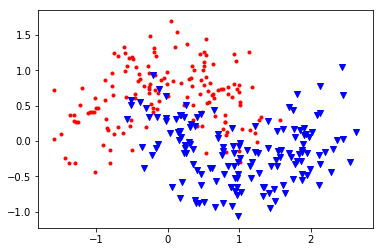

In [51]:
#グラフ
plt.scatter(X_0[:,0],X_0[:,1],c="red",marker=".")
plt.scatter(X_1[:,0],X_1[:,1],c="blue",marker="v")

In [54]:
#トレインデータとテストデータに分割
from sklearn.model_selection import train_test_split

Y = y.reshape(N, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8)

C:\Users\hfuis\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [61]:
#tensor flowで実装。
#隠れ層。
num_hidden = 3

x = tf.placeholder(tf.float32, shape = [None, 2]) #入力データ
t = tf.placeholder(tf.float32, shape = [None, 1]) #正解の出力(教師)

#入力層-隠れ層
#入力は2次元(重みWは2×2)、bはバイアス(2×1)。
#truncated_normal:切断正規分布(defaultだとmean=0,std=1)
W = tf.Variable(tf.truncated_normal(shape = [2, num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)            #モデルの出力

#隠れ層-出力層
#入力は2次元(重みVは2×1)、bはバイアス(scalar)。
#truncated_normal:切断正規分布(defaultだとmean=0,std=1)
V = tf.Variable(tf.truncated_normal(shape = [num_hidden, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)            #モデルの出力

#交差エントロピー誤差関数(目的関数)
#最小化させることで予想を行う。
cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))

#目的関数の偏微分と勾配降下法
#最小化させることで予想を行う。
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy) 
#0.05は学習率

#modelの出力yと教師tが一致しているか(bool値)
#greater(x,y) x>yの真理値
correct_prediction = tf.equal(tf.to_float(tf.greater(y,0.5)), t)

In [62]:
#予測精度
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [63]:
from sklearn.utils import shuffle
batch_size = 20 #ミニバッチサイズ
n_batches = N//batch_size

#変数(tf.Variable)の初期化
init = tf.global_variables_initializer()
#セッション(計算グラフ(学習)の実行環境)
sess = tf.Session()
#変数初期化の実行
sess.run(init)

#データの学習実行(ミニバッチ勾配降下法)
for epoch in range(500): #各エポックごとにデータをシャッフル。
    X_, Y_ = shuffle(X_train, Y_train)
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict = {
            x: X_[start:end],
            t: Y_[start:end]
        })

In [64]:
accuracy_rate = accuracy.eval(session = sess, feed_dict = {
    x:X_test,
    t:Y_test
})

print("accuracy: ", accuracy_rate)

accuracy:  0.9166667


In [3]:
#決定境界作図
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

#クラス数だけ色とマーカーを作る。
markers = ('s', 'x')
cmap = ListedColormap(('blue', 'green'))

In [4]:
#変数(特徴量)のグラフを格子状に分ける。
x1_min, x1_max = x[:, 0].min()-1, x[:, 0].max()+1
x2_min, x2_max = x[:, 1].min()-1, x[:, 1].max()+1
x1_mesh, x2_mesh = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                                   np.arange(x2_min, x2_max, 0.01))

NameError: name 'x' is not defined

In [5]:
x = np.arange(0, 5)

In [6]:
x

array([0, 1, 2, 3, 4])